# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [16]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [17]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


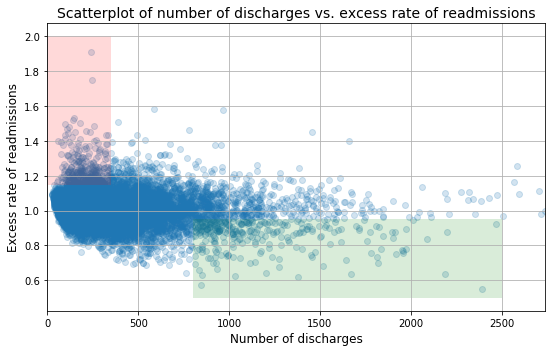

In [18]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
clean_hospital_read_df.shape

(11578, 12)

In [8]:
clean_hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


### A. Do you agree with the above analysis and recommendations? Why or why not?

The conclusions and the recommendations drawn from the initial observations based on the above scatter plot looks logical. <br>But again, a plot is just a a tool for further analysis.So, I beleive a thorough analysis is required before getting to the final conclusion.

#### Check if the statistics provided above is correct:

In [80]:
df_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]
df_1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]
# 63% have excess readmission rate greater than 1
per_100 = (len(df_100[df_100["Excess Readmission Ratio"]>1])/len(df_100)) * 100
# 44% have excess readmission rate greater than 1
per_1000 = (len(df_1000[df_1000["Excess Readmission Ratio"]>1])/len(df_1000)) * 100
#In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
print("In hospitals/facilities with number of discharges < 100: ")
print("Mean excess readmission rate is :", round(df_100['Excess Readmission Ratio'].mean(),3)," and excess readmission rate greater than 1:",round(per_100,2),"%")
print("In hospitals/facilities with number of discharges > 1000: ")
print("Mean excess readmission rate is :", round(df_1000['Excess Readmission Ratio'].mean(),3)," and excess readmission rate greater than 1:",round(per_1000,2),"%")

In hospitals/facilities with number of discharges < 100: 
Mean excess readmission rate is : 1.023  and excess readmission rate greater than 1: 63.22 %
In hospitals/facilities with number of discharges > 1000: 
Mean excess readmission rate is : 0.978  and excess readmission rate greater than 1: 44.49 %


Thus, the information provided above in the statistic section is absolutely correct!

#### Check correlation between hospital capacity (number of discharges) and readmission rates:

In statistics, the correlation coefficient measures the strength and direction of a linear relationship between two variables on a scatterplot. That means, as one variable changes in value, the other variable tends to change in a specific direction. The value is always between +1 and –1.

In [103]:
#correlation between hospital capacity (number of discharges) and readmission rates.
r1 = round(clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio']),4)
print(r1)

-0.0974


In [102]:
r_squared=r1**2
r_squared

0.00948676

Here, the value is -0.0974 which means there is a weak downhill (negative) linear relationship between hospital capacity (number of discharges) and readmission rates.
<br> So, that confirms the first observation from the plot i.e.<b> "Overall, rate of readmissions is trending down with increasing number of discharges"</b>

### B.1. Setup an appropriate hypothesis test.

Now we have 2 groups of data:
<br>1. GROUP 1: Number of discharges < 100 and > 0
<br>2. GROUP 2: Number of discharges > 1000
<br>
<br>H0 = There is no difference between excess readmission rate in both groups i.e. mu100 - mu1000 = 0
<br>HA = There is a difference i.e. mu100 - mu1000 > 0

### B.2. Compute and report the observed significance value (or p-value).

In [84]:
from scipy.stats import ttest_ind
# The function ttest_ind takes two data samples as arguments and returns the calculated statistic and p-value.
statistic, p_value = ttest_ind(df_100['Excess Readmission Ratio'], df_1000['Excess Readmission Ratio'])

print('Statistics=%.16f, p=%.16f' % (statistic, p_value)) # interpret


Statistics=10.0606203985007934, p=0.0000000000000000


### B.3. Report statistical significance for  𝛼 = .01:

In [99]:
alpha = 0.01
if p_value > alpha:
    print('p-value is more than our significance level and thus H0 is accepted')
else:
    print('p-value is very small and less than our significance level and thus so we must reject H0')

p-value is very small and less than our significance level and thus so we must reject H0


### B.4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance and practical significance differ in this scenario.Based on the computaions we did above on the 2 groups,there is a significant difference between the number of discharges and the readmission rates since we accpted our alternate Hypothesis.
<br><br>
But, the correlation between hospital capacity (number of discharges) and readmission rates is calculated as -0.0974 which indicates weak relationship. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges. 
<br><br>
Thus, we need to explore other causes of high readmissions rates

### B.5. Look at the scatterplot above
What are the advantages and disadvantages of using this plot to convey information?

The above plot indicates a negative relationship between hospital capacity (number of discharges) and readmission rates which is accurate. 

<b>Construct another plot that conveys the same information in a more direct manner.

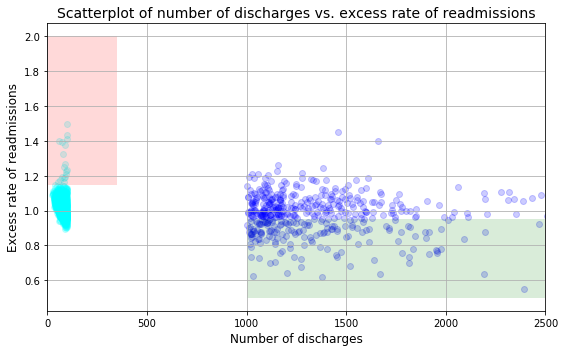

In [171]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df_100['Number of Discharges']]
y = list(df_100['Excess Readmission Ratio'])

l = [a for a in df_1000['Number of Discharges']]
m = list(df_1000['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2,color='cyan', label='G<100')
ax.scatter(l, m,alpha=0.2,color='blue', label='G>1000')

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True, label='Lower')


ax.set_xlim([0, 2500])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()